In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textblob

In [5]:
df=pd.read_csv('../datasets/best_seller.csv')
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


**Is there any missing data?**

In [6]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

**Are there any duplicates?**

In [30]:
df.duplicated().sum()

0

**Are there any spelling errors in the Name column?**

In [11]:
i=[]
for name in df['Name']:
    blob=TextBlob(name)
    corrected_name=blob.correct()
    i.append(f'Correct:{corrected_name}')
len(i)

550

In [29]:
count=0
for name in df['Name']:
    blob = textblob.TextBlob(name)
    if not blob.correct:
        count+=1

print('No. of spelling errors in Name is',count)

No. of spelling errors in Name is 0


**Create a plot showing the top 10 authors by rating.**

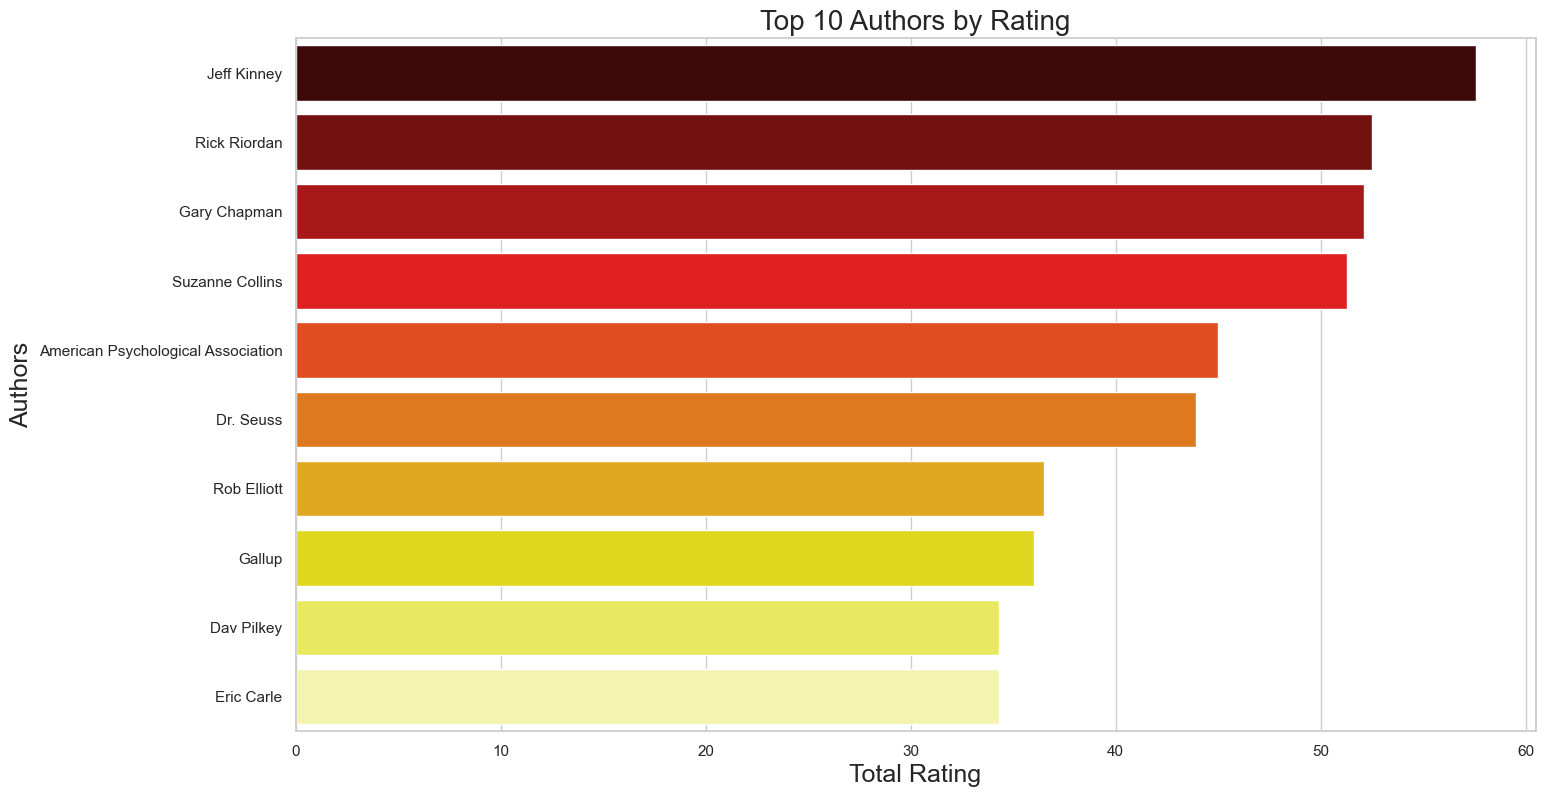

In [105]:
top10_authors=df.groupby('Author')['User Rating'].sum().nlargest(10).reset_index()
# top10_authors
sns.set(style='whitegrid')
plt.figure(figsize=(16, 9))
sns.barplot(y=top10_authors.Author,x=top10_authors['User Rating'],palette='hot')
plt.title('Top 10 Authors by Rating',fontsize=20)
plt.xlabel('Total Rating',fontsize=18)
plt.ylabel('Authors',fontsize=18)
plt.show()

**Create a pie chart showing the distribution of book genre.**

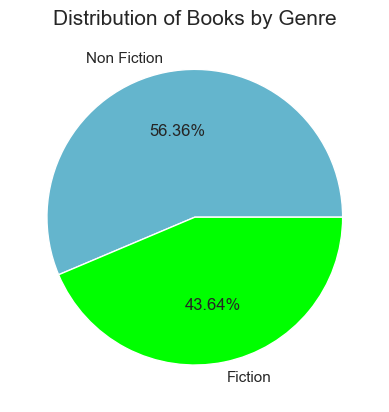

In [87]:
genre_distribution=df.Genre.value_counts()
# plt.figure(figsize=(16,9))
plt.pie(genre_distribution.values,labels=genre_distribution.index,autopct="%.2f%%",colors=['c','#00ff00'])
plt.title('Distribution of Books by Genre',fontsize=15)
plt.show()

**Create a plot showing the top 5 books by number of reviews.**

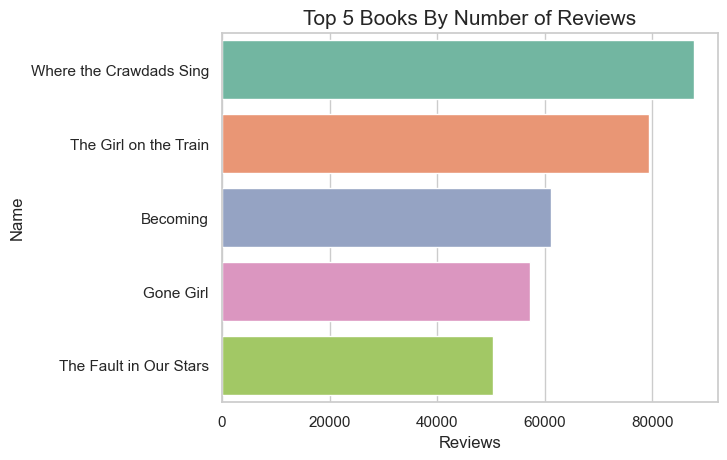

In [224]:
book_reviews=df.drop_duplicates(subset='Name')
book_reviews=book_reviews.sort_values(by="Reviews",ascending=False).head().reset_index()
# book_reviews
sns.barplot(y=book_reviews.Name,x=book_reviews.Reviews,palette='Set2',)
plt.title('Top 5 Books By Number of Reviews',fontsize=15)
plt.show()

**Are there any outliers?**

In [98]:
df.corr(numeric_only=1)

,User Rating,Reviews,Price,Year
User Rating,1.000000,-0.001729,-0.133086,0.242383
Reviews,-0.001729,1.000000,-0.109182,0.263560
Price,-0.133086,-0.109182,1.000000,-0.153979
Year,0.242383,0.263560,-0.153979,1.000000


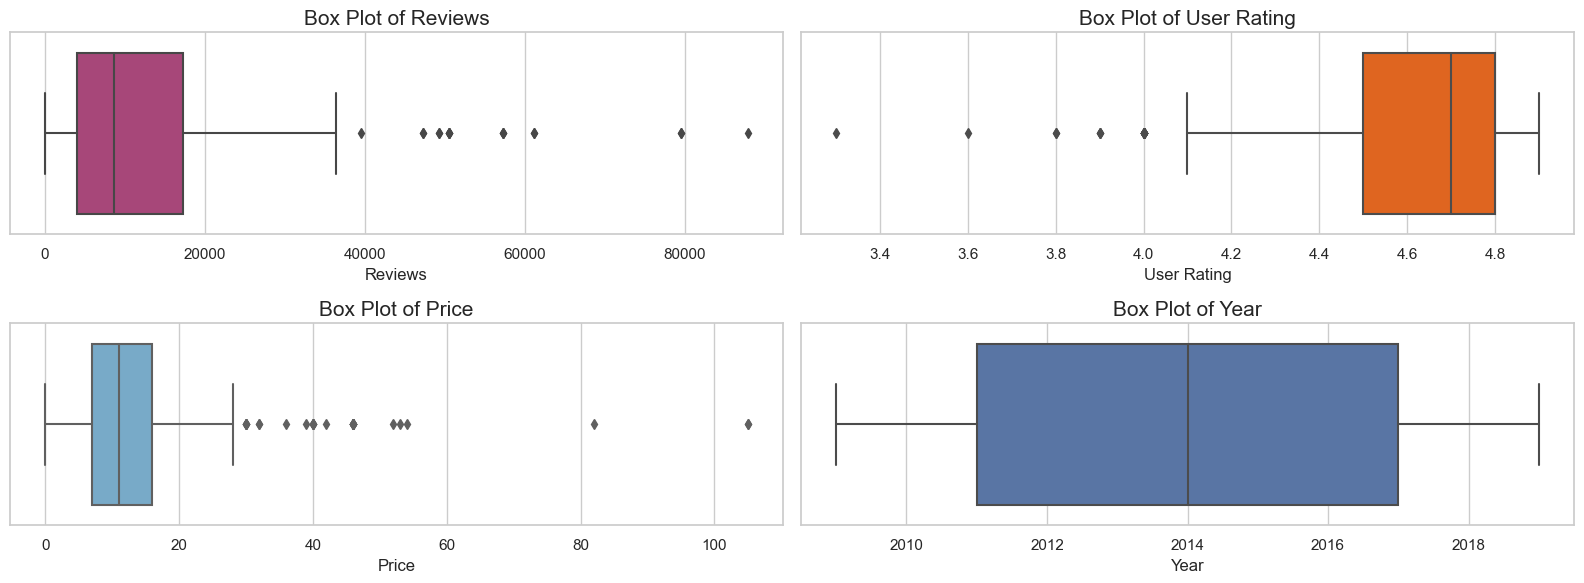

In [144]:
plt.figure(figsize=(16, 6))

plt.subplot(2,2,1)
sns.boxplot(x=df.Reviews,palette='magma')
plt.title('Box Plot of Reviews',fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(x=df['User Rating'],palette='hot')
plt.title('Box Plot of User Rating',fontsize=15)

plt.subplot(2,2,3)
sns.boxplot(x=df['Price'],palette='Blues')
plt.title('Box Plot of Price',fontsize=15)

plt.subplot(2,2,4)
sns.boxplot(x=df['Year'],palette='deep')
plt.title('Box Plot of Year',fontsize=15)

# adjust spacing between subplots
plt.tight_layout()
plt.show()

**Create your own question and answer it.**

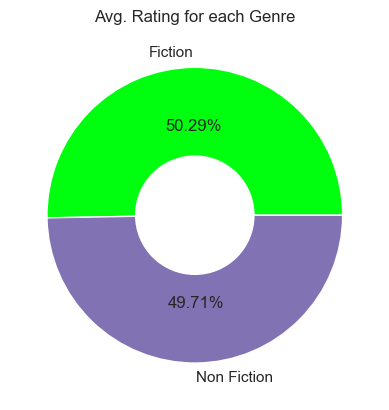

In [160]:
fig,ax=plt.subplots()
genre_avg_rating=df.groupby('Genre')['User Rating'].mean().reset_index()
plt.pie(genre_avg_rating['User Rating'],labels=genre_avg_rating.Genre,autopct='%.2f%%',colors=['#00ff0f','m'])
center_hole = plt.Circle((0, 0), 0.4, color='white', fill=True)
ax.add_patch(center_hole)
plt.title('Avg. Rating for each Genre')
plt.show()

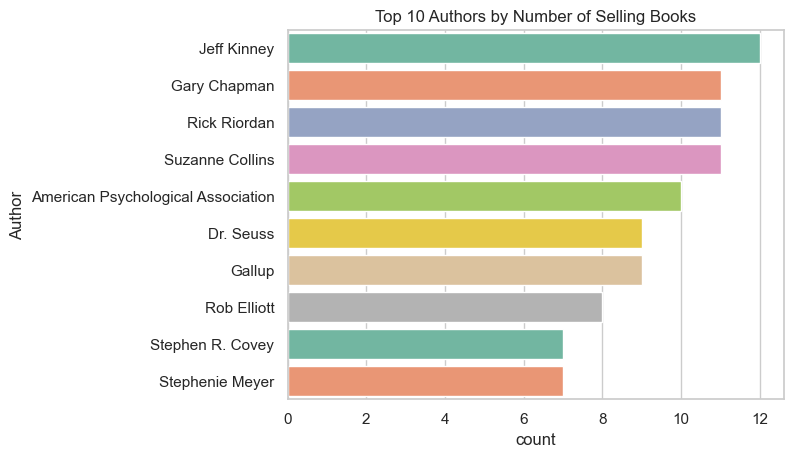

In [182]:
sns.countplot(y=df.Author,order=df.Author.value_counts().index[:10],palette='Set2')
plt.title('Top 10 Authors by Number of Selling Books')
plt.show()

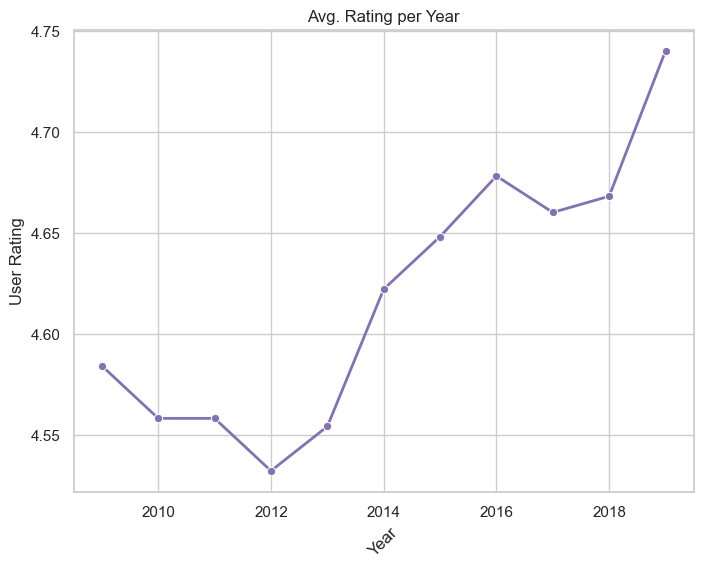

In [198]:
plt.figure(figsize=(8,6))
year_rating=df.groupby('Year')['User Rating'].mean()
sns.lineplot(x=year_rating.index,y=year_rating.values,color='m',marker='o',linewidth=2)
plt.title('Avg. Rating per Year')
plt.xlabel('Year',rotation=45)
plt.ylabel('User Rating')
plt.show()

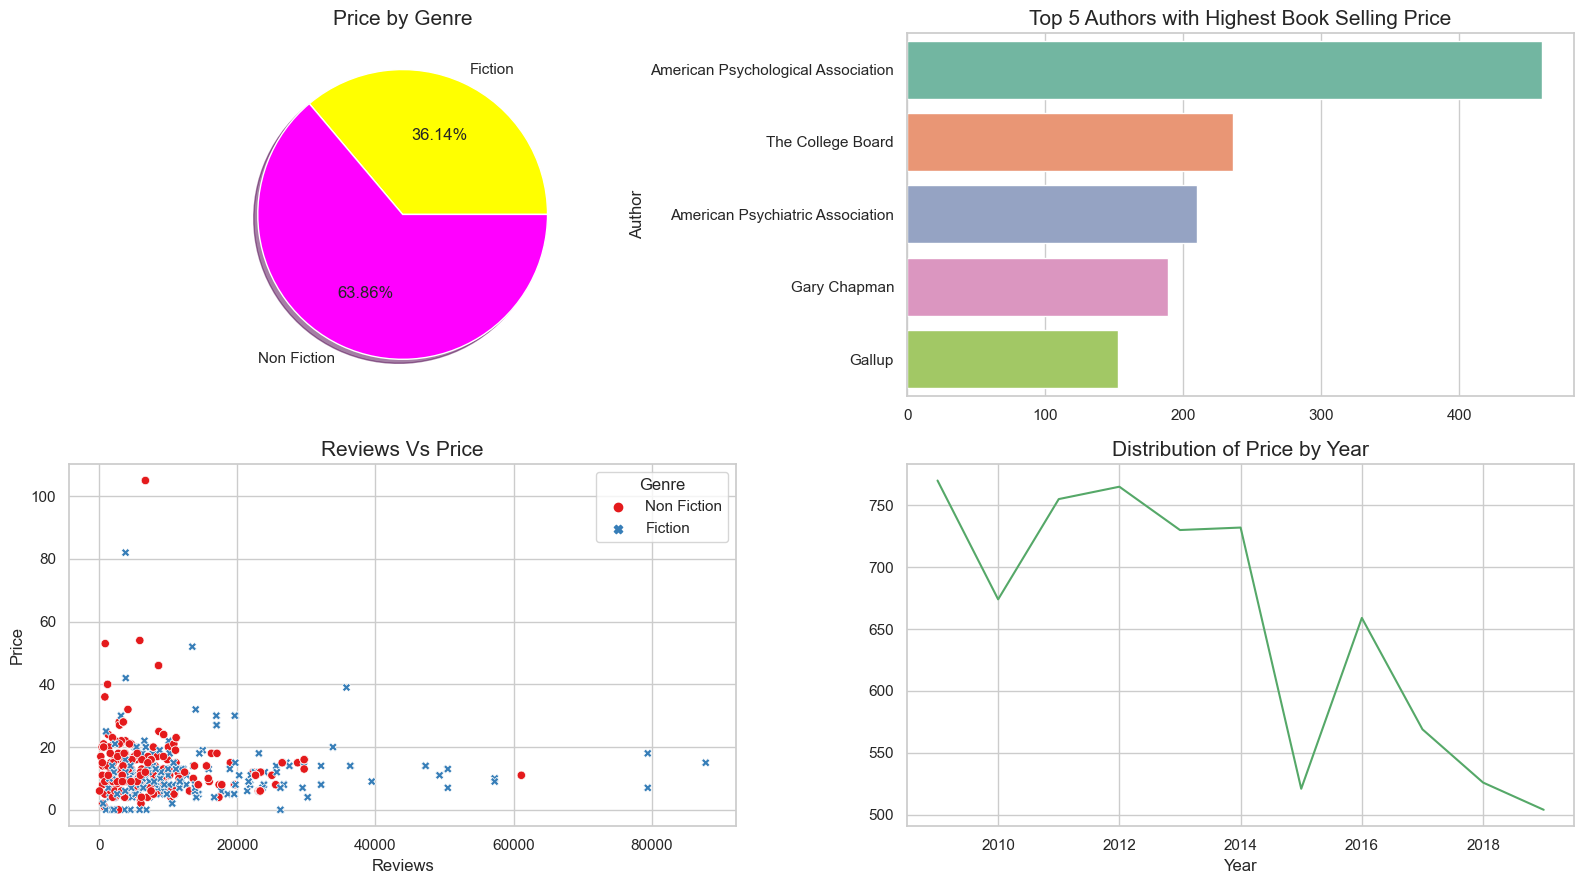

In [222]:
plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
genre_price_distribution=df.groupby('Genre')['Price'].sum()
plt.pie(genre_price_distribution.values,labels=genre_price_distribution.index,autopct="%.2f%%",colors=['#ffff00','#ff00ff'],shadow=True)
plt.title('Price by Genre',fontsize=15)

plt.subplot(2,2,2)
author_price_distribution=df.groupby('Author')['Price'].sum().nlargest(5).head()
sns.barplot(y=author_price_distribution.index,x=author_price_distribution.values,palette='Set2')
plt.title('Top 5 Authors with Highest Book Selling Price',fontsize=15)

plt.subplot(2,2,3)
sns.scatterplot(x=df.Reviews,y=df.Price,palette='Set1',hue=df.Genre,style=df.Genre)
plt.title('Reviews Vs Price',fontsize=15)

plt.subplot(2,2,4)
year_price_distribution=df.groupby('Year')['Price'].sum()
sns.lineplot(x=year_price_distribution.index,y=year_price_distribution.values,color='g')
plt.title('Distribution of Price by Year',fontsize=15)

plt.tight_layout()
plt.show()

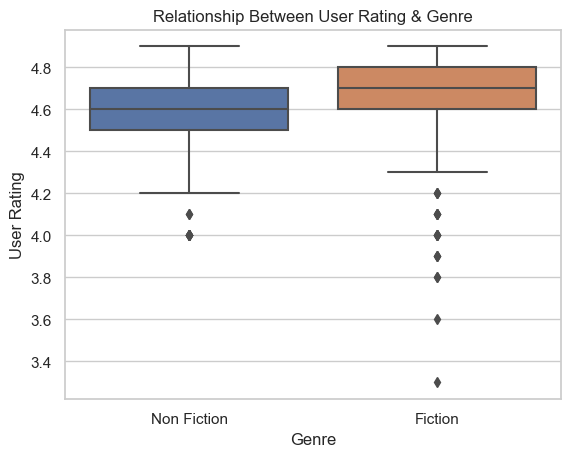

In [226]:
sns.boxplot(x=df.Genre,y=df['User Rating'])
plt.title('Relationship Between User Rating & Genre')
plt.show()